<a href="https://colab.research.google.com/github/dron1t/codelabfun/blob/main/IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report American census

Data is American census from 1994. Prediction task for this report is to determine whether a person makes over 50k a year or less. The [latest data](https://www.firstrepublic.com/insights-education/how-much-does-the-average-american-make) says that median american worker earns `$54,132`.  

The average income in 2020 according to Statista was `$71,456`.  
This can be calculates as aproximatly `234 572 PLN` before taxes. Average US tax wage is 27.2%, so net income is currently `181 042 PLN` (~15k PLN monthly). Taking into account inflation `$50,000` from December 1994 would be worth `$99,130.59` in December 2022.  


## Importing data

In [67]:
import pandas as pd

train_data = pd.read_csv('drive/MyDrive/inf/io/census/adult.train.csv')
test_data = pd.read_csv('drive/MyDrive/inf/io/census/adult.test.csv')

data = pd.concat([train_data, test_data])

We are having 48842 records in our set.

In [68]:
data

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Checking data

In [69]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
eduction          0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [70]:
data.isin([' ?', '']).sum()

age                  0
workclass         2799
fnlwgt               0
eduction             0
education.num        0
marital.status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     857
income               0
dtype: int64

### Missing values in columns:
* workclass 2799
* occupation 2809
* native.country 857

Checking types of data

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   eduction        48842 non-null  object
 4   education.num   48842 non-null  int64 
 5   marital.status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital.gain    48842 non-null  int64 
 11  capital.loss    48842 non-null  int64 
 12  hours.per.week  48842 non-null  int64 
 13  native.country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Check duplicates

In [72]:
data.duplicated().sum()

29

## Some cleanup before analysis

We've noticed that income has 2 values for each category `51K.` and `51K` without ending dot 

In [73]:
data['income'] = data['income'].replace(' <=50K.', ' <=50K')
data['income'] = data['income'].replace(' >50K.', ' >50K')
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Analysis

Feature classes per sex

In [74]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(['sex'])
categorical_features

Index(['workclass', 'eduction', 'marital.status', 'occupation', 'relationship',
       'race', 'native.country', 'income'],
      dtype='object')

<ipython-input-75-9c12d2f713dc>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5, 2, i+1)


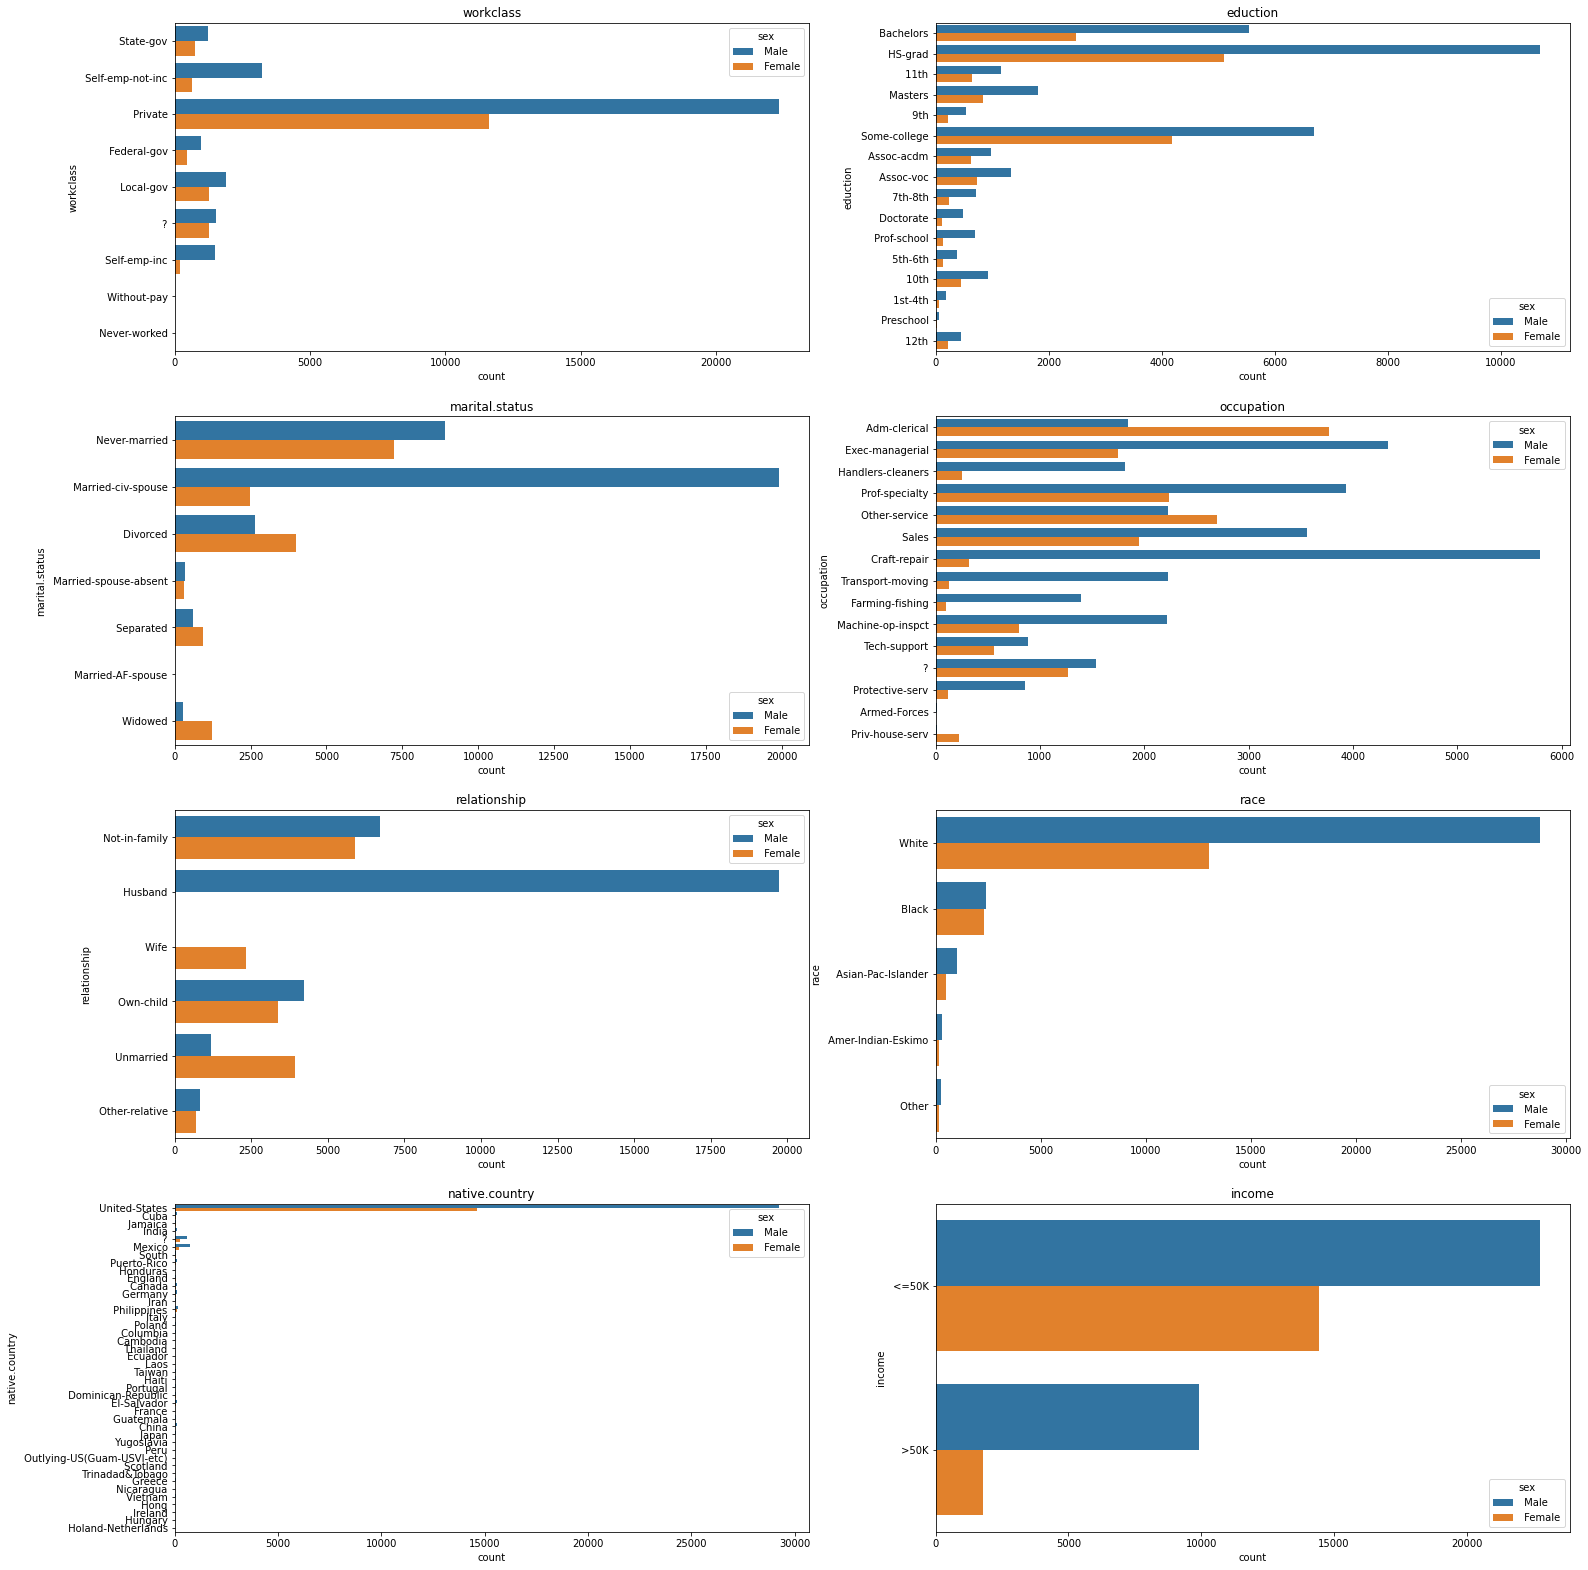

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,35))
plt.subplot(521)
dt = data
i=0
for c in categorical_features:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(y=c, data=dt, hue='sex')
    plt.title(c)

plt.show()

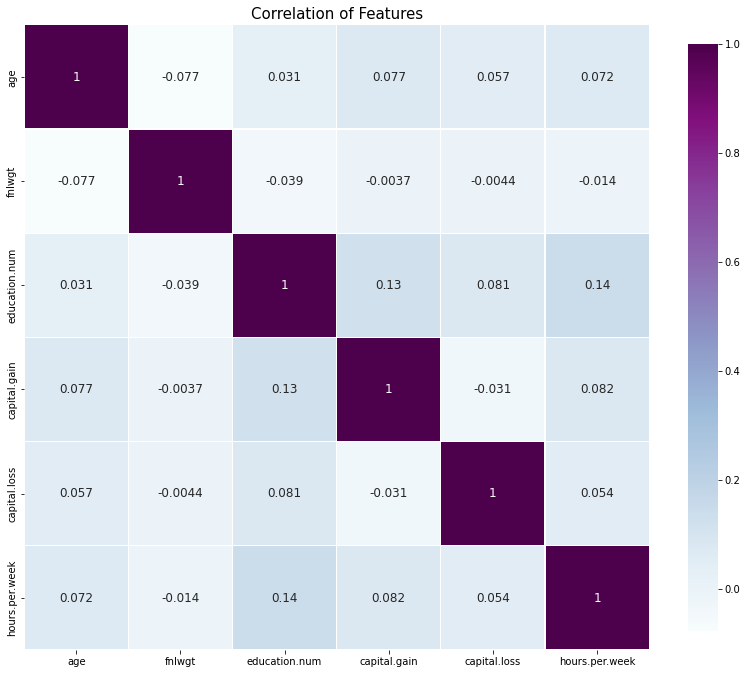

In [76]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(150, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "BuPu",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

## Data preparation (pre-processing of data)

Drop duplicates

In [77]:
data = data.drop_duplicates()

We have one binary value column: sex and multiple discreete value columns.

We are going to replace values in column sex with (0,1) values

We are creating a columns with names corresponding to values from discreet columns, so when option was chosen the value in corresponding column is set to 1 otherwise to 0

In [78]:
binary_features = ['sex']
nominal_features = ['workclass'  ,'marital.status' , 'relationship' , 'race' ,'native.country' , 'occupation']



Drop education as it is already encoded

In [79]:
data = data.drop('eduction', axis=1)

## Binning countries
As natice.country column has rare lalbels and fairly uncommon values it will be hard for algorithms to cut through the noise. Because of that we decided to group up togther all countries except United-States and Mexico. 

In [81]:
data['native.country'].value_counts()

 United-States                 43792
 Mexico                          943
 ?                               856
 Philippines                     294
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Guatemala                        86
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [82]:
data['native.country'] = np.where(data['native.country'].isin([' United-States', ' Mexico']),
                           data['native.country'].str.title(),
                           'Other')

data['native.country'].value_counts()

 United-States    43792
Other              4055
 Mexico             943
Name: native.country, dtype: int64

## Split data

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

(train_set, test_set) = train_test_split(data, train_size=0.3, random_state=163686)

train_classes = train_set['income']
train_set = train_set.drop(['income'], axis=1)
test_classes = test_set['income']
test_set = test_set.drop(['income'], axis=1)

train_set_columns = train_set.columns
test_set_columns = test_set.columns

## Impute missing values

We have few columns with some missing data. There are a few ways to deal with it by using imputation: [link](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) 
* Ignore it
* Use median
* Use the most fequent 
* Use constant value
* Use kNN algorithm
* Use Multivariate Imputation by Chained Equation (MICE)
* Use Deep Learning (Datawig)

We can't use median or mean as these values belong to categorical features. As that we are going to use: Simple imputer - most frequest as this the one that works with categorical features. 

In [84]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer( strategy='most_frequent', missing_values=[' ?'])
imp_mean.fit(train_set)
imputed_train_set = imp_mean.transform(train_set)

imp_mean = SimpleImputer( strategy='most_frequent',  missing_values=[' ?'])
imp_mean.fit(test_set)
imputed_test_set = imp_mean.transform(test_set)

In [85]:
'?' in imputed_train_set

False

In [86]:
'?' in imputed_test_set

False

In [87]:
test_set.columns.values

array(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country'], dtype=object)

In [88]:
imputed_train_set

array([[47, ' Private', 159550, ..., 0, 40, ' United-States'],
       [41, ' Self-emp-not-inc', 29762, ..., 0, 70, ' United-States'],
       [50, ' State-gov', 198103, ..., 0, 40, ' United-States'],
       ...,
       [60, ' Private', 165441, ..., 0, 40, ' United-States'],
       [52, ' Private', 221936, ..., 0, 40, ' United-States'],
       [42, ' Private', 202466, ..., 0, 45, ' United-States']],
      dtype=object)

### Hot encoding
We are hot ecoding data using nominal_features which corresponds to categorical data within our dataset. 

"Categorical data are variables that contain label values rather than numeric values"[[1]](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)[[2]](https://en.wikipedia.org/wiki/Nominal_category)

In [89]:
test_set_he = pd.get_dummies(pd.DataFrame(imputed_test_set, columns=test_set.columns), columns=nominal_features)
train_set_he = pd.get_dummies(pd.DataFrame(imputed_train_set, columns=train_set.columns), columns=nominal_features)

## Compensation of missing column
As we did imputation we are missing some columns in test set compared to the train set. So we're going to add that to the test set. 

In [90]:
import numpy as np
diff = np.setdiff1d(train_set_he.columns.values, test_set_he.columns.values)

In [91]:
diff

array([], dtype=object)

In [92]:
for column in diff:
  if column not in train_set_he.columns:
    train_set_he[column] = 0
  else:
    test_set_he[column] = 0

diff = np.setdiff1d(train_set_he.columns.values, test_set_he.columns.values)
diff

array([], dtype=object)

In [93]:
train_set_he['sex'].values

array([' Female', ' Male', ' Female', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [94]:
train_set_he['sex'] = train_set_he['sex'].map({' Female': 1, ' Male': 0})
test_set_he['sex'] = test_set_he['sex'].map({' Female': 1, ' Male': 0})

train_set_he

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,47,159550,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,29762,10,0,5013,0,70,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,50,198103,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48,310639,10,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,80145,9,0,0,0,60,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,68,191517,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14633,42,287244,9,0,0,0,55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14634,60,165441,4,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14635,52,221936,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_set_scaled = scaler.fit_transform(train_set_he)
test_set_scaled = scaler.fit_transform(test_set_he)

## Decision Tree [[1]](https://medium.com/analytics-vidhya/classification-in-decision-tree-a-step-by-step-cart-classification-and-regression-tree-8e5f5228b11e)[[2]](https://scikit-learn.org/stable/modules/tree.html#tree)

Decision tree is supervised learning algorithm used for classification and regression. The goal is to create a model that can predict a target value based on vector of feature variables by using simple decision rules.
Sklearn is using CART algorithm. CART is using Gini Impurity for splitting nodes into sub-nodes. 

27571
80.72790091646415 %
[[22502  3467]
 [ 3115  5069]]


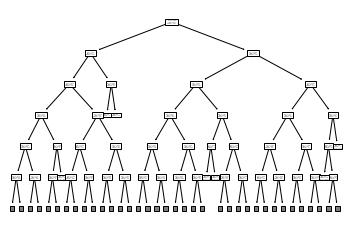

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_set_scaled, train_classes.values)

tree.plot_tree(clf, max_depth=5)
# r = export_text(clf, feature_names=columns.values)
# print(r)
good_predictions = 0
len = test_set_scaled.shape[0]
test_classes_values = test_classes.values
res = clf.predict(test_set_scaled)
for i,r in enumerate(res):
    if r == test_classes_values[i]:
        good_predictions = good_predictions + 1
print(good_predictions)
print(good_predictions / len * 100, "%")
decision_tree_matrix = confusion_matrix(test_classes_values, res)
print(decision_tree_matrix)

In [97]:
def generate_confusion_matrix_heat_map(matrix, title):
  ax = sns.heatmap(matrix, fmt='d', annot=True, cmap='Blues')
  ax.set_title(title)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values')

  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.show()

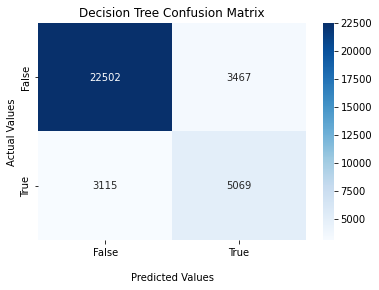

In [98]:
generate_confusion_matrix_heat_map(decision_tree_matrix, 'Decision Tree Confusion Matrix')

# kNN [[1]](https://pl.wikipedia.org/wiki/K_najbli%C5%BCszych_s%C4%85siad%C3%B3w) [[2]](https://www.ibm.com/topics/knn)
The k-nearest neighbors algorithm is a supervised learning classifier which uses the proximity to make grouping of the point in order to do classification or prediction. The short explaination of it:
1. Observation C having vector of X variables is compared to other observations - for example by euclidean distance.
2. Assing k closest observations to C.
3. Calculate the average of the prediction point. 

One of the most important things is to chose K which strongly influences the outcome of the training. 



In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Changing the income values to numeric

In [ ]:
# test_classes['income'] = test_classes['income'].map({' <=50K': 0, ' >50K': 1})
# train_classes['income'] = test_classes['income'].map({' <=50K': 0, ' >50K': 1})

In [100]:
knn = KNeighborsClassifier(n_neighbors=9) ###k=9
knn = knn.fit(train_set_scaled, train_classes.values)

In [101]:
pred = knn.predict(test_set_scaled)

knn_matrix = confusion_matrix(test_classes.values, pred)
classification_report(test_classes.values, pred)

'              precision    recall  f1-score   support\n\n       <=50K       0.87      0.91      0.89     25969\n        >50K       0.66      0.56      0.61      8184\n\n    accuracy                           0.83     34153\n   macro avg       0.77      0.74      0.75     34153\nweighted avg       0.82      0.83      0.82     34153\n'

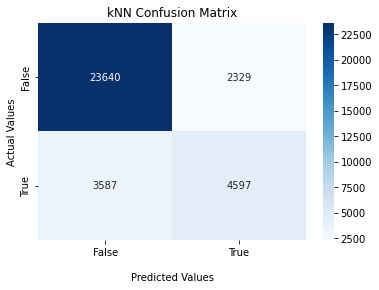

In [102]:
generate_confusion_matrix_heat_map(knn_matrix, 'kNN Confusion Matrix')

# Naive Bayes
Naive Bayes are a family of classifiers that apply Bayes' theorem. It is simple probablistic classificator. They are based on theory about independence of predictors. 

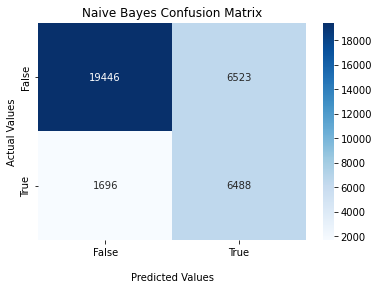

In [106]:
from sklearn.naive_bayes import BernoulliNB

gnb = BernoulliNB()

gnb.fit(train_set_scaled, train_classes.values)

pred = gnb.predict(test_set_scaled)

naive_bayes_matrix = confusion_matrix(test_classes.values, pred)
classification_report(test_classes.values, pred)

generate_confusion_matrix_heat_map(naive_bayes_matrix, 'Naive Bayes Confusion Matrix')

In [108]:
report = classification_report(test_classes.values, pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.92      0.75      0.83     25969
        >50K       0.50      0.79      0.61      8184

    accuracy                           0.76     34153
   macro avg       0.71      0.77      0.72     34153
weighted avg       0.82      0.76      0.77     34153



In [104]:
print('Training set score: {:.4f}'.format(gnb.score(train_set_scaled, train_classes.values)))

print('Test set score: {:.4f}'.format(gnb.score(test_set_scaled, test_classes.values)))

Training set score: 0.6664
Test set score: 0.7604


# Neural Networks


In [109]:
from keras.models import Sequential
from keras.layers import Dense

In [115]:
train_set_scaled.shape

(14637, 50)

In [116]:
model = Sequential()
model.add(Dense(8, input_dim=50, activation='relu', name='input_layer'))
# 1st layer: input_dim=8, 6 nodes, RELU
model.add(Dense(6, activation='relu', name='layer1'))
# 2nd layer: 3 nodes, RELU
model.add(Dense(3, activation='relu', name='layer2'))
# 3rd output layer:
model.add(Dense(1, activation='sigmoid', name='output-layer'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
def change_classes_to_int(dataset):
  return dataset.map({' <=50K':0, ' >50K': 1})

In [120]:
train_classes_val = change_classes_to_int(train_classes)
test_classes_val = change_classes_to_int(test_classes)

In [125]:
print(train_classes_val.value_counts())
print(test_classes_val.value_counts())

0    11140
1     3497
Name: income, dtype: int64
0    25969
1     8184
Name: income, dtype: int64


In [126]:
from tensorflow.python import train
NB_EPOCHS = 100  # num of epochs to test for
BATCH_SIZE = 16




history = model.fit(train_set_scaled,
                    train_classes_val.values,
                    validation_data=(test_set_scaled, test_classes_val.values),
                    epochs=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=0)

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(test_set_scaled)
y_predict = np.argmax(y_predict, axis=1)
accuracy_score(test_classes_val.values, y_predict)

1068/1068 [==============================] - 2s 2ms/step


0.7603724416595906

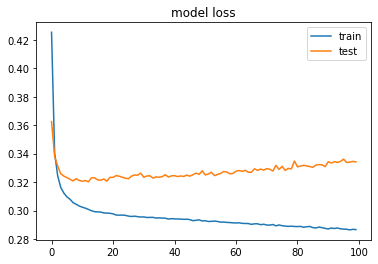

In [139]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()